In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['Date','Open','High','Low','Close','Volume',
                'Dividends','Stock Splits','Brand_Name','Ticker',
                'Industry_Tag','Country','Capital Gains']

dataset = pd.read_csv('World-Stock-Prices-Dataset.csv', names=column_names, header=0, na_values='?')

dataset['Date'] = pd.to_datetime(dataset['Date'], utc=True)

dataset['Date'] = dataset['Date'].dt.tz_localize(None)

dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

feature_columns = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
                   'Year', 'Month', 'Day']
x = dataset[feature_columns].select_dtypes(include=[np.number])
y = dataset['Close']


KeyboardInterrupt: 

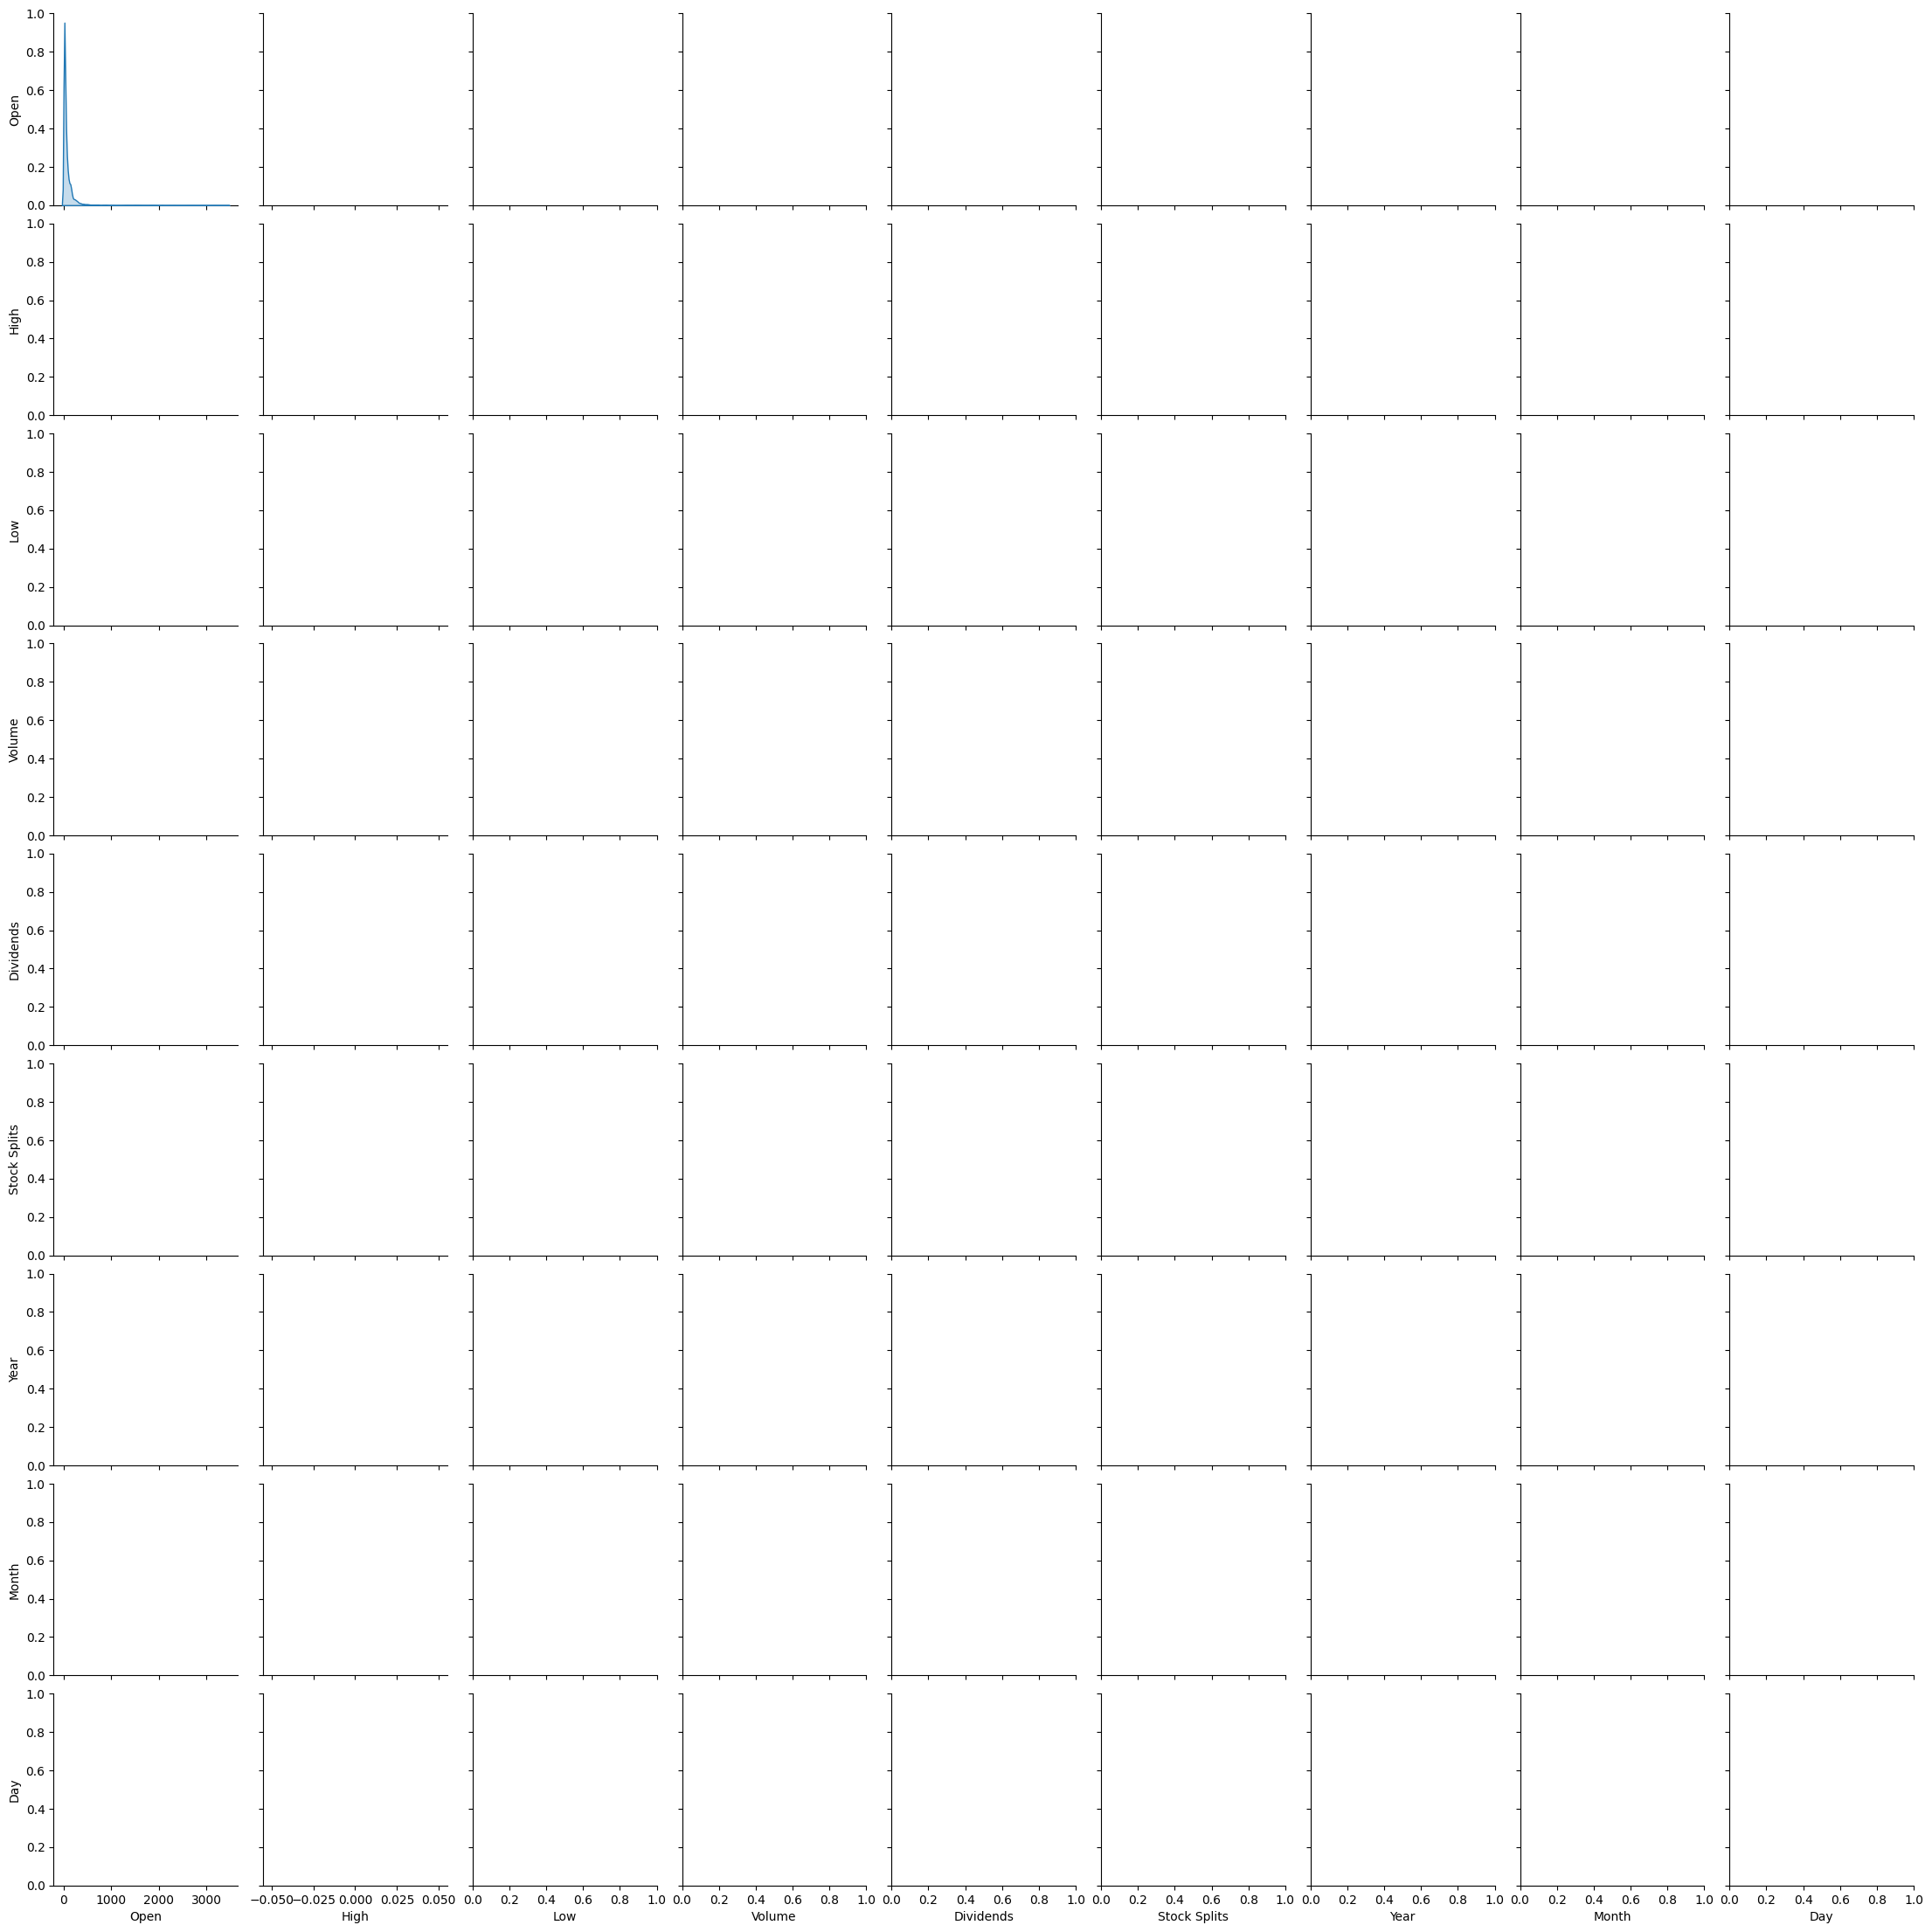

In [5]:
train_dataset = dataset.sample(frac=1.0, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[feature_columns], diag_kind='kde')
print("Dataset shape:", dataset.shape)
train_dataset.describe().transpose()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = dataset.dropna(subset=['Close'])

labels = dataset['Close']
features = dataset.drop(columns=['Close', 'Date'])  
features = features.select_dtypes(include=[np.number])  

assert features.shape[0] == labels.shape[0], "Features and labels must have the same number of rows."

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)



In [23]:

close = np.array(y).reshape(-1,1)

normalizer = layers.Normalization(input_shape=[1, ], axis=None)
normalizer.adapt(x_train)
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(8192, activation='relu', input_shape=[1, ]),
    layers.Dense(4096, activation='relu', input_shape=[1, ]),
    layers.Dense(4096, activation='relu', input_shape=[1, ]),
    layers.Dense(8192, activation='relu',input_shape=[1, ]),
    layers.Dense(1)
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8192)           │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8192)           │    33,562,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,927,044 (320.16 MB)

 Trainable params: 83,927,041 (320.16 MB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

history = model.fit(
    np.array(features),
    np.array(labels),
    epochs=100,
    validation_split=0.2,
    verbose=1,
    )

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 10)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)
  • training=True
  • mask=None